In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
device

device(type='cuda')

In [3]:
df = pd.read_csv("nlpdf.csv")



In [4]:
df.isnull().sum()

Informal    0
Formal      0
dtype: int64

In [5]:
df.shape

(6893, 2)

In [6]:
df

,Informal,Formal
0,dear all due to the delay in ubs windows accou...,dear all due to the delay in ubs windows accou...
1,i wanna put this old dog out of its misery bef...,i would like to put this old dog out of its mi...
2,hi there want to see some nasty hot action cum...,hi there want to see some nasty hot action cum...
3,hello mark i have attached an outline that wil...,hello mark i have attached an outline that wil...
4,cst to brett r peter n tracee cc kelly h sarah...,cst to brett r peter n tracee cc kelly h sarah...
...,...,...
6888,wanna formulate the breakout groups prior to t...,i would like to formulate the breakout groups ...
6889,kay\n\nplz find attached a clean and blackline...,kay\n\nplease find attached a clean and blackl...
6890,hello guys\n\nlisted below is an email from os...,hello guys\n\nlisted below is an email from os...
6891,hi andy\n\n i would not be able to make the me...,hi andy\n\n i would not be able to make the me...


In [7]:
# Remove duplicates based on 'Informal' only (keeping first instance)
df_cleaned = df.drop_duplicates(subset='Informal', keep='first')

In [8]:
df_cleaned

,Informal,Formal
0,dear all due to the delay in ubs windows accou...,dear all due to the delay in ubs windows accou...
1,i wanna put this old dog out of its misery bef...,i would like to put this old dog out of its mi...
2,hi there want to see some nasty hot action cum...,hi there want to see some nasty hot action cum...
3,hello mark i have attached an outline that wil...,hello mark i have attached an outline that wil...
4,cst to brett r peter n tracee cc kelly h sarah...,cst to brett r peter n tracee cc kelly h sarah...
...,...,...
6888,wanna formulate the breakout groups prior to t...,i would like to formulate the breakout groups ...
6889,kay\n\nplz find attached a clean and blackline...,kay\n\nplease find attached a clean and blackl...
6890,hello guys\n\nlisted below is an email from os...,hello guys\n\nlisted below is an email from os...
6891,hi andy\n\n i would not be able to make the me...,hi andy\n\n i would not be able to make the me...


In [9]:
df_cleaned.shape

(6571, 2)

In [10]:
# Remove unwanted patterns like '\n' from both columns
df_cleaned['Informal'] = df_cleaned['Informal'].str.replace(r'\n', ' ', regex=True)
df_cleaned['Formal'] = df_cleaned['Formal'].str.replace(r'\n', ' ', regex=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_4856\3645733210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Informal'] = df_cleaned['Informal'].str.replace(r'\n', ' ', regex=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_4856\3645733210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Formal'] = df_cleaned['Formal'].str.replace(r'\n', ' ', regex=True)


In [11]:
df_cleaned

,Informal,Formal
0,dear all due to the delay in ubs windows accou...,dear all due to the delay in ubs windows accou...
1,i wanna put this old dog out of its misery bef...,i would like to put this old dog out of its mi...
2,hi there want to see some nasty hot action cum...,hi there want to see some nasty hot action cum...
3,hello mark i have attached an outline that wil...,hello mark i have attached an outline that wil...
4,cst to brett r peter n tracee cc kelly h sarah...,cst to brett r peter n tracee cc kelly h sarah...
...,...,...
6888,wanna formulate the breakout groups prior to t...,i would like to formulate the breakout groups ...
6889,kay plz find attached a clean and blacklined ...,kay please find attached a clean and blacklin...
6890,hello guys listed below is an email from osma...,hello guys listed below is an email from osma...
6891,hi andy i would not be able to make the meet...,hi andy i would not be able to make the meet...


In [12]:
df_cleaned['Informal'] = df_cleaned['Informal'].astype(str).str.lower()
df_cleaned['Formal'] = df_cleaned['Formal'].astype(str).str.lower()

train_df, test_df = train_test_split(df_cleaned, test_size=0.1, random_state=42)

# Add start/end tokens to target
train_df['Formal'] = "<start> " + train_df['Formal'] + " <end>"
test_df['Formal'] = "<start> " + test_df['Formal'] + " <end>"

C:\Users\acer\AppData\Local\Temp\ipykernel_4856\337068429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Informal'] = df_cleaned['Informal'].astype(str).str.lower()
C:\Users\acer\AppData\Local\Temp\ipykernel_4856\337068429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Formal'] = df_cleaned['Formal'].astype(str).str.lower()


In [13]:
def tokenize(text):
    return text.strip().split()

def build_vocab(texts, specials=["<pad>", "<unk>", "<start>", "<end>"], max_size=10000):
    counter = {}
    for t in texts:
        for token in tokenize(t):
            counter[token] = counter.get(token, 0) + 1
    sorted_tokens = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    vocab = {tok: idx for idx, tok in enumerate(specials)}
    for token, _ in sorted_tokens[:max_size - len(specials)]:
        vocab[token] = len(vocab)
    return vocab


In [14]:
input_vocab = build_vocab(train_df['Informal'].tolist())
target_vocab = build_vocab(train_df['Formal'].tolist())

input_pad_idx = input_vocab['<pad>']
target_pad_idx = target_vocab['<pad>']


In [15]:
def encode(text, vocab, max_len):
    tokens = tokenize(text)
    ids = [vocab.get(tok, vocab['<unk>']) for tok in tokens]
    ids = ids[:max_len] + [vocab['<pad>']] * (max_len - len(ids))
    return ids


In [16]:
class EmailDataset(Dataset):
    def __init__(self, df, input_vocab, target_vocab, max_len=50):
        self.inputs = [encode(t, input_vocab, max_len) for t in df['Informal']]
        self.targets = [encode(t, target_vocab, max_len) for t in df['Formal']]

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return torch.tensor(self.inputs[idx]), torch.tensor(self.targets[idx])

train_dataset = EmailDataset(train_df, input_vocab, target_vocab)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [17]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, hid_dim, num_layers=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=input_pad_idx)
        self.lstm = nn.LSTM(emb_dim, hid_dim, num_layers=num_layers, batch_first=True)

    def forward(self, x):
        embedded = self.embedding(x)
        outputs, (h, c) = self.lstm(embedded)
        return h, c

class Decoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, hid_dim, num_layers=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=target_pad_idx)
        self.lstm = nn.LSTM(emb_dim, hid_dim, num_layers=num_layers, batch_first=True)
        self.out = nn.Linear(hid_dim, vocab_size)

    def forward(self, input, h, c):
        embedded = self.embedding(input.unsqueeze(1))
        output, (h, c) = self.lstm(embedded, (h, c))
        output = self.out(output.squeeze(1))
        return output, h, c



In [18]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, trg, teacher_forcing=0.5):
        batch_size, trg_len = trg.size()
        vocab_size = self.decoder.out.out_features

        outputs = torch.zeros(batch_size, trg_len, vocab_size).to(device)
        h, c = self.encoder(src)
        input = trg[:, 0]

        for t in range(1, trg_len):
            output, h, c = self.decoder(input, h, c)
            outputs[:, t] = output
            top1 = output.argmax(1)
            input = trg[:, t] if torch.rand(1).item() < teacher_forcing else top1

        return outputs


In [21]:
encoder = Encoder(len(input_vocab), 128, 256).to(device)
decoder = Decoder(len(target_vocab), 128, 256).to(device)
model = Seq2Seq(encoder, decoder).to(device)
model

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(10000, 128, padding_idx=0)
    (lstm): LSTM(128, 256, batch_first=True)
  )
  (decoder): Decoder(
    (embedding): Embedding(9998, 128, padding_idx=0)
    (lstm): LSTM(128, 256, batch_first=True)
    (out): Linear(in_features=256, out_features=9998, bias=True)
  )
)

In [74]:
encoder = Encoder(len(input_vocab), 128, 256).to(device)
decoder = Decoder(len(target_vocab), 128, 256).to(device)
model = Seq2Seq(encoder, decoder).to(device)

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index=target_pad_idx)

for epoch in range(100):
    model.train()
    epoch_loss = 0
    for src, trg in train_loader:
        src, trg = src.to(device), trg.to(device)
        optimizer.zero_grad()
        output = model(src, trg)
        output = output[:, 1:].reshape(-1, output.shape[-1])
        trg = trg[:, 1:].reshape(-1)
        loss = criterion(output, trg)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")


Epoch 1, Loss: 1245.2058
Epoch 2, Loss: 1146.6337
Epoch 3, Loss: 1119.5669
Epoch 4, Loss: 1095.0974
Epoch 5, Loss: 1072.0737
Epoch 6, Loss: 1040.0014
Epoch 7, Loss: 1004.0766
Epoch 8, Loss: 963.3168
Epoch 9, Loss: 934.9114
Epoch 10, Loss: 903.2975
Epoch 11, Loss: 871.6226
Epoch 12, Loss: 841.6655
Epoch 13, Loss: 806.6160
Epoch 14, Loss: 778.2002
Epoch 15, Loss: 750.7031
Epoch 16, Loss: 720.7512
Epoch 17, Loss: 693.9917
Epoch 18, Loss: 664.2632
Epoch 19, Loss: 633.9733
Epoch 20, Loss: 610.5118
Epoch 21, Loss: 581.4743
Epoch 22, Loss: 562.4839
Epoch 23, Loss: 536.3393
Epoch 24, Loss: 511.1108
Epoch 25, Loss: 488.0033
Epoch 26, Loss: 471.2555
Epoch 27, Loss: 445.8235
Epoch 28, Loss: 427.8782
Epoch 29, Loss: 401.5894
Epoch 30, Loss: 382.6379
Epoch 31, Loss: 359.6329
Epoch 32, Loss: 348.2105
Epoch 33, Loss: 329.7010
Epoch 34, Loss: 310.4462
Epoch 35, Loss: 292.2956
Epoch 36, Loss: 272.0901
Epoch 37, Loss: 258.6742
Epoch 38, Loss: 244.9515
Epoch 39, Loss: 231.4943
Epoch 40, Loss: 215.4571
Ep

In [22]:
idx2word = {idx: word for word, idx in target_vocab.items()}

def decode(model, sentence, max_len=50):
    model.eval()
    encoded = torch.tensor(encode(sentence.lower(), input_vocab, max_len)).unsqueeze(0).to(device)
    h, c = model.encoder(encoded)

    input_token = torch.tensor([target_vocab["<start>"]], device=device)
    result = []

    for _ in range(max_len):
        output, h, c = model.decoder(input_token, h, c)
        top1 = output.argmax(1).item()
        word = idx2word.get(top1, "<unk>")
        if word == "<end>":
            break
        result.append(word)
        input_token = torch.tensor([top1], device=device)

    return " ".join(result)


In [23]:
print(decode(model, "Hi"))


supervision findlay whenever whoever toledo values daybr accreting myself dolphin grocery antonio parkinglending confidentiality theni prioritizing sukhy reminder demoes infokenduncancom arent ask ask israel disposition combined bart findlay combined 2241 raabs raabs bring points ratchet guillermos restricted terrie puma vincejkaminskienroncom manicure gentleman electives 78 words lawyers bring bring oscar incorporate


In [77]:
idx2word = {idx: word for word, idx in target_vocab.items()}

def greedy_decode(model, src_seq, max_len=50):
    model.eval()
    src_tensor = torch.tensor(src_seq).unsqueeze(0).to(device)  # [1, seq_len]
    with torch.no_grad():
        h, c = model.encoder(src_tensor)
        input_token = torch.tensor([target_vocab["<start>"]], device=device)

        result = []
        for _ in range(max_len):
            output, h, c = model.decoder(input_token, h, c)
            top1 = output.argmax(1).item()
            word = idx2word.get(top1, "<unk>")
            if word == "<end>":
                break
            result.append(word)
            input_token = torch.tensor([top1], device=device)

    return " ".join(result)


In [78]:
test_inputs = test_df['Informal'].tolist()
test_targets = test_df['Formal'].str.replace("<start> ", "").str.replace(" <end>", "").tolist()

decoded_preds = []
decoded_labels = []

for i in range(len(test_inputs)):
    encoded_input = encode(test_inputs[i].lower(), input_vocab, max_len=50)
    prediction = greedy_decode(model, encoded_input)
    decoded_preds.append(prediction)
    decoded_labels.append(test_targets[i])


In [79]:
print(decoded_preds[:10])

['his status for next week has not been determined yetfontfontbrbra hrefhttpfootball212fantasysp or tslinecommpelinkscriptplayersleaguekournowner53402random2884key235220bjames jacksonba the the the the the the time the the the time the the the the the the the the the the the the the the the the the the the the the the the the the', 'hillary gets 8 million for her forthcoming memoirs the accounting industry list the the last week the last week the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the', 'good morning carla from eliot as a notice for this week for it wednesday september the september 5 the the the the the time the the the market the the the the annual the the the structure the annual the the the the april the last week the forward the', 'i would like a technical explanation of my group to my family the the 7th the the 7th the the the the the the the the the the the the the the the the the the the the the th

In [80]:
print(decoded_labels[:10])

['his status for next we ekends game against new orleans is unknown at this time', 'hillary gets 8 million for her 09   forthcoming memoirs', 'good morning  nob is derated to zero for he 512 for saturday july 28th', 'i would like a copy of these documents electronic or paper  however', 'thanks again for your prompt attention', 'dear gisb members attendees to the meeting on february and interested parties for the meeting on february attached in pdf format please find the agenda attendance list by company and by name and a set of submitted comments from williams gas pipeline', 'doc     attached please find a clean copy of version 6 of the ge turbine agreement', 'i would like to schedule the drafting committee meeting either on the 730 or 81      virginia power comments dated june 6 2001doc', 'kay  further to our call attached please find a markup of the escrow agreement', 'i would like to ask a favor']


In [81]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
smoothie = SmoothingFunction().method4

tokenized_preds = [word_tokenize(p.lower()) for p in decoded_preds]
tokenized_refs = [[word_tokenize(r.lower())] for r in decoded_labels]

bleu_score = corpus_bleu(tokenized_refs, tokenized_preds, smoothing_function=smoothie)
print(f"\nBLEU Score: {bleu_score:.4f}")



BLEU Score: 0.0919


In [82]:
import evaluate
rouge = evaluate.load("rouge")
rouge_score = rouge.compute(predictions=decoded_preds, references=decoded_labels)
print("\nROUGE Scores:")
for k, v in rouge_score.items():
    print(f"{k}: {v:.4f}")



ROUGE Scores:
rouge1: 0.2378
rouge2: 0.1490
rougeL: 0.2243
rougeLsum: 0.2247


In [83]:
exact_matches = sum([p.strip() == r.strip() for p, r in zip(decoded_preds, decoded_labels)])
em_score = exact_matches / len(decoded_preds)
print(f"\nExact Match Accuracy: {em_score:.2%}")



Exact Match Accuracy: 0.00%


### Experiments

In [24]:
def build_model(input_vocab_size, target_vocab_size, emb_dim=128, hid_dim=256, num_layers=1):
    encoder = Encoder(input_vocab_size, emb_dim, hid_dim, num_layers).to(device)
    decoder = Decoder(target_vocab_size, emb_dim, hid_dim, num_layers).to(device)
    model = Seq2Seq(encoder, decoder).to(device)
    return model


In [25]:
def train_model(model, train_loader, epochs=5, lr=0.001, teacher_forcing=0.5):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss(ignore_index=target_pad_idx)
    
    epoch_losses = []  # Store loss per epoch
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for src, trg in train_loader:
            src, trg = src.to(device), trg.to(device)
            optimizer.zero_grad()
            output = model(src, trg, teacher_forcing)
            output = output[:, 1:].reshape(-1, output.shape[-1])
            trg = trg[:, 1:].reshape(-1)
            loss = criterion(output, trg)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        epoch_losses.append(epoch_loss / len(train_loader))
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")
    
    return epoch_losses


In [26]:
idx2word = {idx: word for word, idx in target_vocab.items()}

def greedy_decode(model, src_seq, max_len=50):
    model.eval()
    src_tensor = torch.tensor(src_seq).unsqueeze(0).to(device)
    with torch.no_grad():
        h, c = model.encoder(src_tensor)
        input_token = torch.tensor([target_vocab["<start>"]], device=device)
        result = []
        for _ in range(max_len):
            output, h, c = model.decoder(input_token, h, c)
            top1 = output.argmax(1).item()
            word = idx2word.get(top1, "<unk>")
            if word == "<end>":
                break
            result.append(word)
            input_token = torch.tensor([top1], device=device)
    return " ".join(result)


In [27]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
import evaluate

def evaluate_model(model, test_df):
    decoded_preds = []
    decoded_labels = []

    for i in range(len(test_df)):
        inp = test_df.iloc[i]['Informal']
        ref = test_df.iloc[i]['Formal'].replace("<start> ", "").replace(" <end>", "")
        encoded_input = encode(inp.lower(), input_vocab, max_len=50)
        pred = greedy_decode(model, encoded_input)
        decoded_preds.append(pred)
        decoded_labels.append(ref)

    # BLEU
    smoothie = SmoothingFunction().method4
    tokenized_preds = [word_tokenize(p) for p in decoded_preds]
    tokenized_refs = [[word_tokenize(r)] for r in decoded_labels]
    bleu = corpus_bleu(tokenized_refs, tokenized_preds, smoothing_function=smoothie)

    # ROUGE
    rouge = evaluate.load("rouge")
    rouge_score = rouge.compute(predictions=decoded_preds, references=decoded_labels)

    # Exact Match
    em = sum([p.strip() == r.strip() for p, r in zip(decoded_preds, decoded_labels)]) / len(decoded_preds)

    print(f"\nBLEU: {bleu:.4f}")
    print(f"ROUGE-L: {rouge_score['rougeL']:.4f}")
    print(f"Exact Match: {em:.2%}")
    
    return bleu, rouge_score['rougeL'], em


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
def run_experiment(emb_dim=128, hid_dim=256, num_layers=1, teacher_forcing=0.5, lr=0.001, epochs=100):
    print(f"\n🔬 Running experiment: emb={emb_dim}, hid={hid_dim}, layers={num_layers}, tf={teacher_forcing}, lr={lr}, epochs={epochs}")
    model = build_model(len(input_vocab), len(target_vocab), emb_dim, hid_dim, num_layers=num_layers)
    
    epoch_losses = train_model(model, train_loader, epochs=epochs, lr=lr, teacher_forcing=teacher_forcing)
    bleu, rougeL, em = evaluate_model(model, test_df)
    
    return {
        "emb_dim": emb_dim,
        "hid_dim": hid_dim,
        "num_layers": num_layers,
        "teacher_forcing": teacher_forcing,
        "lr": lr,
        "epochs": epochs,
        "losses": epoch_losses,  # Save epoch losses
        "bleu": bleu,
        "rougeL": rougeL,
        "exact_match": em
    }


In [29]:
results = []

results.append(run_experiment(emb_dim=128, hid_dim=256, num_layers=1))
results.append(run_experiment(emb_dim=128, hid_dim=256, num_layers=2))
results.append(run_experiment(emb_dim=128, hid_dim=256, num_layers=4))
results.append(run_experiment(emb_dim=128, hid_dim=256, num_layers=8))


results.append(run_experiment(emb_dim=256, hid_dim=512, num_layers=2))
results.append(run_experiment(emb_dim=256, hid_dim=512, num_layers=4))
results.append(run_experiment(emb_dim=256, hid_dim=512, num_layers=8))


df_results = pd.DataFrame(results)
print(df_results)







🔬 Running experiment: emb=128, hid=256, layers=1, tf=0.5, lr=0.001, epochs=100
Epoch 1, Loss: 1246.1651
Epoch 2, Loss: 1146.6193
Epoch 3, Loss: 1119.9320
Epoch 4, Loss: 1098.4034
Epoch 5, Loss: 1074.4086
Epoch 6, Loss: 1056.0816
Epoch 7, Loss: 1036.3157
Epoch 8, Loss: 1016.7746
Epoch 9, Loss: 997.4400
Epoch 10, Loss: 978.1128
Epoch 11, Loss: 962.3290
Epoch 12, Loss: 940.1392
Epoch 13, Loss: 920.7425
Epoch 14, Loss: 904.5630
Epoch 15, Loss: 890.9702
Epoch 16, Loss: 862.8540
Epoch 17, Loss: 834.4348
Epoch 18, Loss: 815.8792
Epoch 19, Loss: 791.6276
Epoch 20, Loss: 766.0209
Epoch 21, Loss: 748.7566
Epoch 22, Loss: 733.7506
Epoch 23, Loss: 721.0747
Epoch 24, Loss: 699.3139
Epoch 25, Loss: 687.9650
Epoch 26, Loss: 672.0644
Epoch 27, Loss: 651.1356
Epoch 28, Loss: 631.0891
Epoch 29, Loss: 617.2161
Epoch 30, Loss: 594.7277
Epoch 31, Loss: 579.0529
Epoch 32, Loss: 555.0614
Epoch 33, Loss: 549.3335
Epoch 34, Loss: 536.6250
Epoch 35, Loss: 513.4948
Epoch 36, Loss: 499.2744
Epoch 37, Loss: 474.1

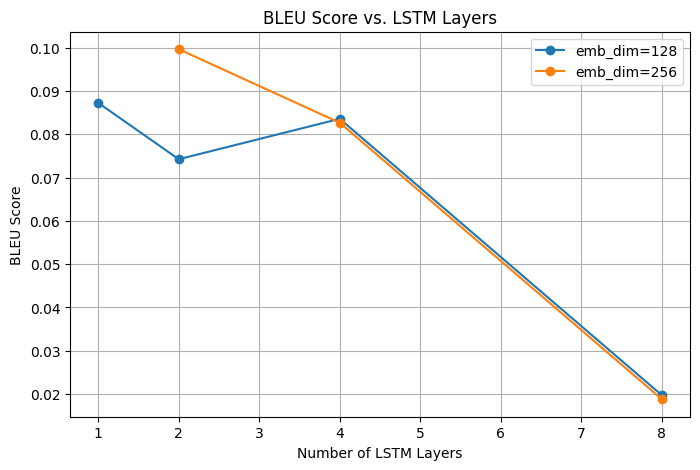

In [30]:
import matplotlib.pyplot as plt

# Plot BLEU vs. num_layers
plt.figure(figsize=(8, 5))
for emb in df_results['emb_dim'].unique():
    subset = df_results[df_results['emb_dim'] == emb]
    plt.plot(subset['num_layers'], subset['bleu'], marker='o', label=f'emb_dim={emb}')

plt.title("BLEU Score vs. LSTM Layers")
plt.xlabel("Number of LSTM Layers")
plt.ylabel("BLEU Score")
plt.legend()
plt.grid(True)
plt.show()


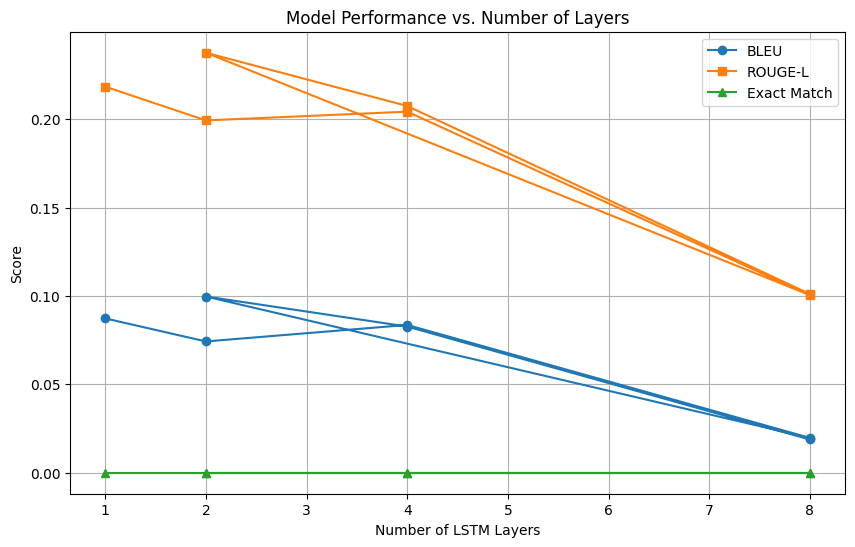

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_results['num_layers'], df_results['bleu'], marker='o', label='BLEU')
plt.plot(df_results['num_layers'], df_results['rougeL'], marker='s', label='ROUGE-L')
plt.plot(df_results['num_layers'], df_results['exact_match'], marker='^', label='Exact Match')

plt.title("Model Performance vs. Number of Layers")
plt.xlabel("Number of LSTM Layers")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


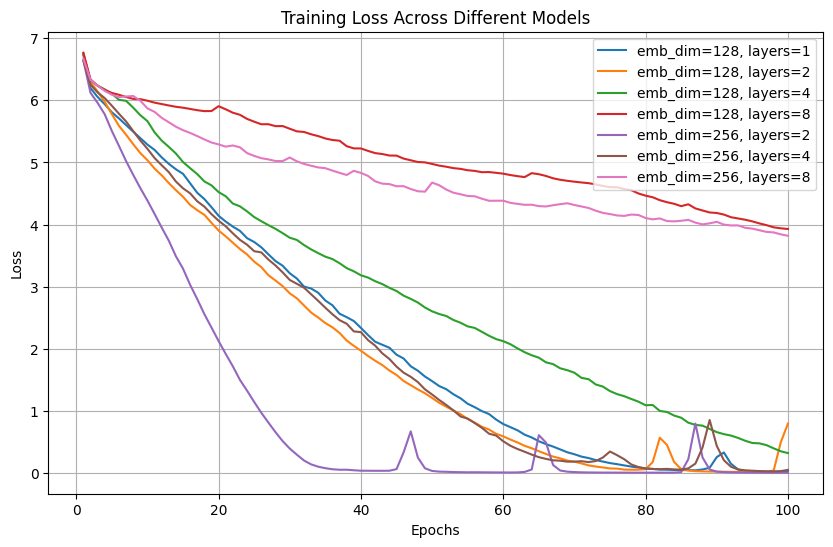

In [32]:
# Plot training loss across experiments
plt.figure(figsize=(10, 6))
for idx, result in enumerate(df_results['losses']):
    label = f"emb_dim={df_results['emb_dim'][idx]}, layers={df_results['num_layers'][idx]}"
    plt.plot(range(1, len(result)+1), result, label=label)

plt.title("Training Loss Across Different Models")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## T5 Model

In [12]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split

df = pd.read_csv("nlpdf.csv")
df['Informal'] = df['Informal'].astype(str)
df['Formal'] = df['Formal'].astype(str)

train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


In [14]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess_function(examples):
    inputs = ["formalize: " + ex for ex in examples["Informal"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["Formal"], max_length=128, truncation=True, padding="max_length")

    # Replace pad token id with -100 for ignored tokens in loss
    labels["input_ids"] = [
        [(label if label != tokenizer.pad_token_id else -100) for label in label_seq]
        for label_seq in labels["input_ids"]
    ]

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Map:   0%|          | 0/6203 [00:00<?, ? examples/s]c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:3970: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
Map: 100%|██████████| 690/690 [00:00<00:00, 1855.95 ex

In [15]:
from transformers import T5ForConditionalGeneration

model = T5ForConditionalGeneration.from_pretrained("t5-small")


In [16]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

training_args = Seq2SeqTrainingArguments(
    output_dir="./t5-tone-rewriter",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    save_total_limit=1,
    predict_with_generate=True,
    generation_max_length=64
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer
)


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\acer\AppData\Local\Temp\ipykernel_99736\3904026350.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [17]:
print(model)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [18]:
trainer.train()


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,0.465200,0.194921
2,0.201600,0.155802
3,0.179500,0.141960
4,0.157700,0.135926
5,0.149900,0.133701


TrainOutput(global_step=3880, training_loss=0.2147621823340347, metrics={'train_runtime': 617.8964, 'train_samples_per_second': 50.194, 'train_steps_per_second': 6.279, 'total_flos': 1049406493163520.0, 'train_loss': 0.2147621823340347, 'epoch': 5.0})

In [27]:
import numpy as np
import evaluate
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize

# Generate predictions
predictions = trainer.predict(tokenized_test)

# Decode outputs
# pred_ids = np.argmax(predictions.predictions, axis=-1)
pred_ids = predictions.predictions
labels_cleaned = np.where(predictions.label_ids == -100, tokenizer.pad_token_id, predictions.label_ids)

# decoded_preds = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
decoded_preds = tokenizer.batch_decode(predictions.predictions, skip_special_tokens=True)

decoded_labels = tokenizer.batch_decode(labels_cleaned, skip_special_tokens=True)

# Show a few predictions
for i in range(10):
    print(f"\nInformal: {test_dataset[i]['Informal']}")
    print(f"Reference: {decoded_labels[i]}")
    print(f"Generated: {decoded_preds[i]}")



Informal: Thanks again
Reference: Thank you once again
Generated: please contact us.

Informal: his status for thur
sdays game against dallas is unclear
Reference: his status for thur sdays game against dallas is unclear
Generated: 

Informal: Appreciate ya staying on top of it
Reference: Thanks for staying on top of this
Generated: 

Informal: his incision on his thigh is very sore and he has not yet been allowed to get out of bed to walk
Reference: his incision on his thigh is very sore and he has not yet been allowed to get out of bed to walk
Generated: 

Informal: hi my name is joooohhhn lavorato from tarona canada
Reference: hi my name is joooohhhn lavorato from tarona canada
Generated: 

Informal: his phone number is 713 544 7649

robert hernandez
is someone who may be able to fill an open position at enron south america
Reference: his phone number is 713 544 7649 robert hernandez is someone who may be able to fill an open position at enron south america
Generated: 

Informal: Y

In [24]:
tokenized_test

Dataset({
    features: ['Informal', 'Formal', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 690
})

In [28]:
# ROUGE
rouge = evaluate.load("rouge")
rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
print("\nROUGE Scores:", rouge_result)

# BLEU
smoothie = SmoothingFunction().method4
bleu_score = corpus_bleu(
    [[word_tokenize(label)] for label in decoded_labels],
    [word_tokenize(pred) for pred in decoded_preds],
    smoothing_function=smoothie
)
print(f"\nBLEU Score: {bleu_score:.4f}")



ROUGE Scores: {'rouge1': 0.012826743627605873, 'rouge2': 0.010202316767293568, 'rougeL': 0.013256416395645471, 'rougeLsum': 0.012975554503049595}

BLEU Score: 0.0000


In [30]:
for i in range(100):
    print(f"\nPredicted IDs: {predictions.predictions[i]}")
    print(f"Decoded: '{decoded_preds[i]}'")



Predicted IDs: [    0 32099   754   574   178     5     1     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Decoded: 'please contact us.'

Predicted IDs: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Decoded: ''

Predicted IDs: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Decoded: ''

Predicted IDs: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Decoded: ''

Predicted IDs: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [32]:
inputs = ["formalize: " + ex for ex in df["Informal"]]
